![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
import seaborn as sns
# Configuración de estilo
sns.set()

In [240]:
from sklearn.preprocessing import OneHotEncoder

# Importación de los datos

In [241]:
# Importamos el excel como un DataFrame
Hospital = pd.read_excel(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\Hospitales-ML\HospitalOk.xlsx')

In [242]:
Hospital.head(27)

,EDAD,DIABETES,HOSPITALIZACION ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIZADO,MUESTRAS TOMADAS,CUP,EPOC,BIOPSIA,COMPLICACION POST BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACION UPC
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
5,55,SI,SI,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3,0
6,53,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3,0
7,67,NO,NO,6.20,NO,SI,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2,0
8,69,NO,NO,6.00,NO,NO,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4,0
9,44,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLUCOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3,0


In [243]:
# Observamos que solamente tres columnas son de tipo numérico. Está bien, esas son EDAD, PSA y MUESTRAS TOMADAS.
# También están los días de hospitalización pero las desestimamos porque serán eliminadas
Hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDAD                        568 non-null    int64  
 1   DIABETES                    568 non-null    object 
 2   HOSPITALIZACION ULTIMO MES  568 non-null    object 
 3   PSA                         564 non-null    float64
 4   BIOPSIAS PREVIAS            566 non-null    object 
 5   VOLUMEN PROSTATICO          567 non-null    object 
 6   ANTIBIOTICO UTILIZADO       568 non-null    object 
 7   MUESTRAS TOMADAS            568 non-null    int64  
 8   CUP                         567 non-null    object 
 9   EPOC                        566 non-null    object 
 10  BIOPSIA                     568 non-null    object 
 11  COMPLICACION POST BIOPSIA   568 non-null    object 
 12  FIEBRE                      568 non-null    object 
 13  ITU                         568 non

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [244]:
# Eliminamos las columnas DIAS HOSPITALIZACION MQ y DIAS HOSPITALIZACIÓN UPC, ya que nos interesa saber
# si requirió o no hospitalización, pero no nos interesa saber la cantidad de días

Hospital.drop(columns=['DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACION UPC'], inplace=True)

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [245]:
columnas_numericas = ['EDAD', 'PSA', 'MUESTRAS TOMADAS']

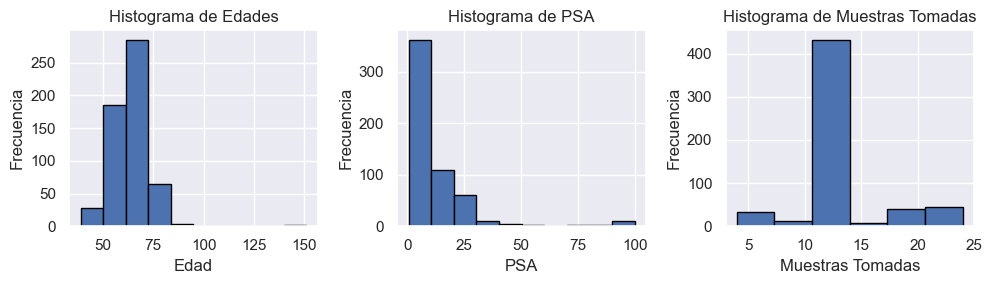

In [246]:
# Realizamos un histograma para las variables numéricas
plt.figure(figsize=(10, 3))  # Tamaño de la figura

# Histograma de la columna EDAD
plt.subplot(1, 3, 1)  # 1 filas, 3 columnas, primer gráfico
plt.hist(Hospital['EDAD'], bins=10, edgecolor='black')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma de la columna PSA
plt.subplot(1, 3, 2)  # 1 filas, 3 columnas, segundo gráfico
plt.hist(Hospital['PSA'], bins=10, edgecolor='black')
plt.title('Histograma de PSA')
plt.xlabel('PSA')
plt.ylabel('Frecuencia')

# Histograma de la columna MUESTRAS TOMADAS
plt.subplot(1, 3, 3)  # 1 filas, 3 columnas, tercer gráfico
plt.hist(Hospital['MUESTRAS TOMADAS'], bins=6, edgecolor='black')
plt.title('Histograma de Muestras Tomadas')
plt.xlabel('Muestras Tomadas')
plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustamos el espaciado entre subgráficos

In [247]:
# Imputamos las edades erróneas con el valor de la media  de ese modo no influirán en ninguna medida
Hospital.loc[Hospital['EDAD'] > 105, 'EDAD'] = int(round(Hospital['EDAD'].mean()))

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [248]:
# Las edades encontradas eran valores superiores a 140 años, por lo que se sabe que es un error.
# En este caso se optó por asignarlas como nulos. 
# No hay otros valores para imputar y/o eliminar.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

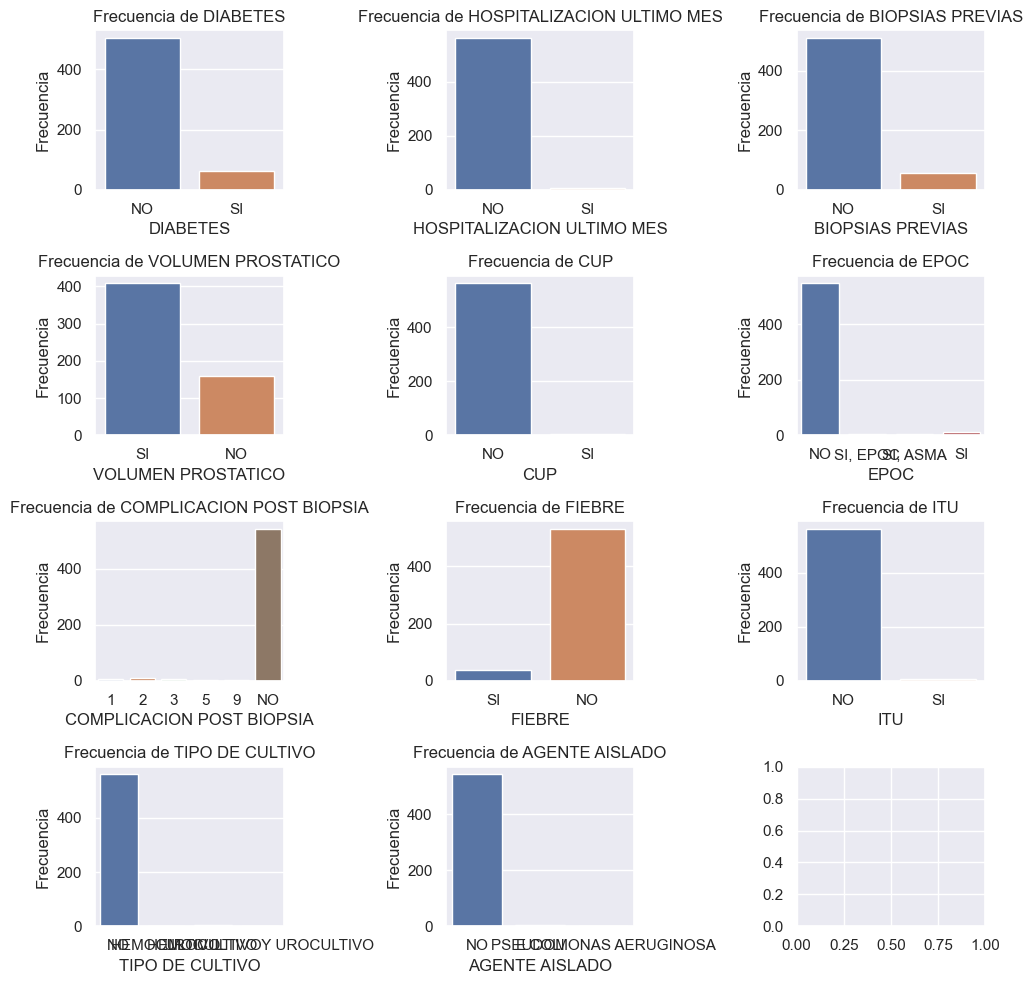

In [249]:
# Subplots para cada variable categórica
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))  # número de filas y columnas

# Gráfico de barras para cada variable categórica
sns.countplot(data=Hospital, x='DIABETES', ax=axes[0,0])
axes[0,0].set_title('Frecuencia de DIABETES')
axes[0,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='HOSPITALIZACION ULTIMO MES', ax=axes[0,1])
axes[0,1].set_title('Frecuencia de HOSPITALIZACION ULTIMO MES')
axes[0,1].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='BIOPSIAS PREVIAS', ax=axes[0,2])
axes[0,2].set_title('Frecuencia de BIOPSIAS PREVIAS')
axes[0,2].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='VOLUMEN PROSTATICO', ax=axes[1,0])
axes[1,0].set_title('Frecuencia de VOLUMEN PROSTATICO')
axes[1,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='CUP', ax=axes[1,1])
axes[1,1].set_title('Frecuencia de CUP')
axes[1,1].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='EPOC', ax=axes[1,2])
axes[1,2].set_title('Frecuencia de EPOC')
axes[1,2].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='COMPLICACION POST BIOPSIA', ax=axes[2,0])
axes[2,0].set_title('Frecuencia de COMPLICACION POST BIOPSIA')
axes[2,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='FIEBRE', ax=axes[2,1])
axes[2,1].set_title('Frecuencia de FIEBRE')
axes[2,1].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='ITU', ax=axes[2,2])
axes[2,2].set_title('Frecuencia de ITU')
axes[2,2].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='TIPO DE CULTIVO', ax=axes[3,0])
axes[3,0].set_title('Frecuencia de TIPO DE CULTIVO')
axes[3,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='AGENTE AISLADO', ax=axes[3,1])
axes[3,1].set_title('Frecuencia de AGENTE AISLADO')
axes[3,1].set_ylabel('Frecuencia')

plt.tight_layout() # diseño de los subplots

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10004\3785574075.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


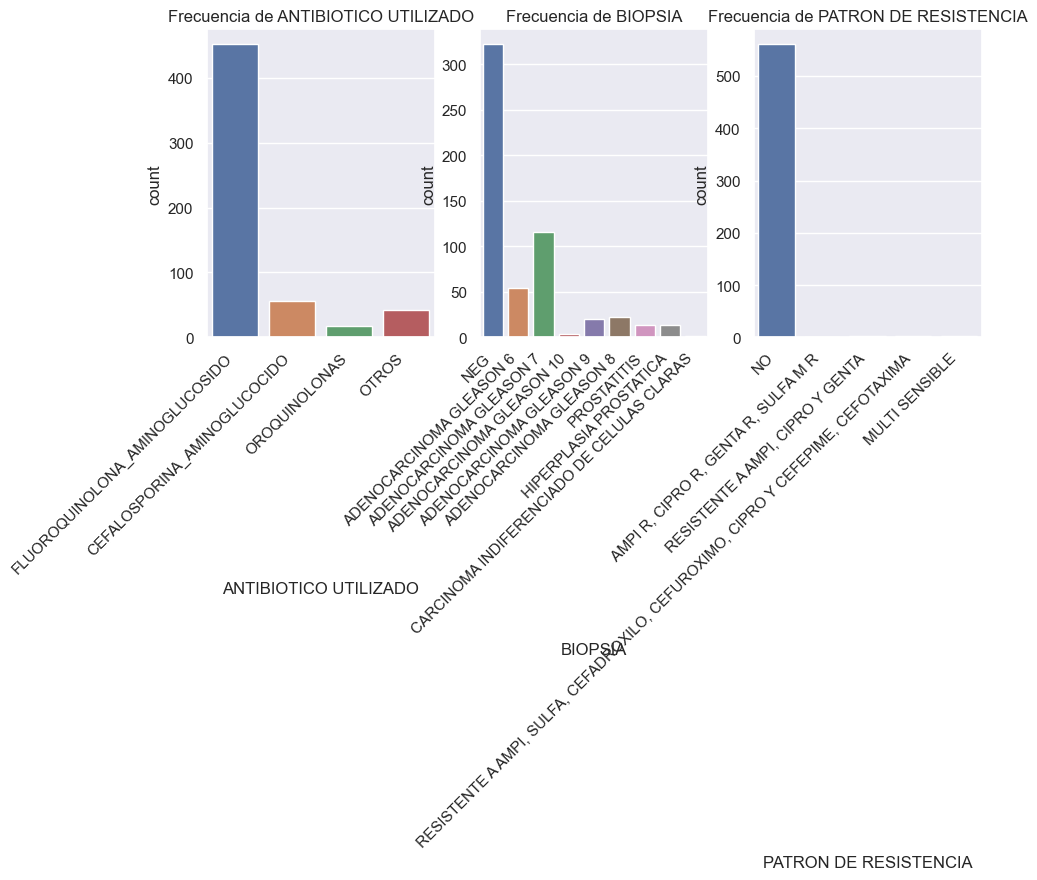

In [250]:
#Graficamos por separado las variables con etiquetas extensas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

sns.countplot(data=Hospital, x='ANTIBIOTICO UTILIZADO', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Frecuencia de ANTIBIOTICO UTILIZADO')

sns.countplot(data=Hospital, x='BIOPSIA', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_title('Frecuencia de BIOPSIA')

sns.countplot(data=Hospital, x='PATRON DE RESISTENCIA', ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_title('Frecuencia de PATRON DE RESISTENCIA')

plt.tight_layout()

En HospitalOk, realizamos el reagrupamiento de las columnas categóricas que consideramos
fuertemente binarias, en SI/NO (y conservamos nan)

In [251]:
# Creamos copia para modificar y tener un respaldo original de comparación
HospitalOk = Hospital.copy()

In [252]:
# Reagrupamos valores de 'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA' en SI/NO, conservando los nan
HospitalOk['EPOC'].replace('SI, EPOC', 'SI', inplace=True)
HospitalOk['EPOC'].replace('SI, ASMA', 'SI', inplace=True)

# Verificamos que esté bien dividida en SI/NO y conserve los nan
print(HospitalOk['EPOC'].unique())
print(HospitalOk['EPOC'].value_counts())
print(HospitalOk['EPOC'].count())
print(HospitalOk['EPOC'].describe())

['NO' 'SI' nan]
EPOC
NO    546
SI     20
Name: count, dtype: int64
566
count     566
unique      2
top        NO
freq      546
Name: EPOC, dtype: object


In [253]:
# Reagrupamos valores de 'COMPLICACION INFECCIOSA POST BIOPSIA' en SI/NO, conservando los nan si hubiera
HospitalOk['COMPLICACION POST BIOPSIA'] = np.where(
    (HospitalOk['COMPLICACION POST BIOPSIA'] == 'NO'),
    'NO', np.where(pd.isnull(HospitalOk['COMPLICACION POST BIOPSIA']), np.nan, 'SI'))

# Verificamos que esté bien dividida en SI/NO (no existían nan)
print(HospitalOk['COMPLICACION POST BIOPSIA'].unique())
print(HospitalOk['COMPLICACION POST BIOPSIA'].value_counts())
print(HospitalOk['COMPLICACION POST BIOPSIA'].count())
print(HospitalOk['COMPLICACION POST BIOPSIA'].describe())

['SI' 'NO']
COMPLICACION POST BIOPSIA
NO    542
SI     26
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      542
Name: COMPLICACION POST BIOPSIA, dtype: object


In [254]:
#Se deciden imputar los tres registros con valores NaN de hospitalización, ya que en Machine Learning, los NaN en
# el conjunto de etiquetas objetivo no pueden ser manejados para el aprendizaje automático
HospitalOk['HOSPITALIZACION'].replace(np.nan, 'NO', inplace=True)

print(HospitalOk['HOSPITALIZACION'].unique())
print(HospitalOk['HOSPITALIZACION'].value_counts())
print(HospitalOk['HOSPITALIZACION'].count())
print(HospitalOk['HOSPITALIZACION'].describe())

['SI' 'NO']
HOSPITALIZACION
NO    544
SI     24
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      544
Name: HOSPITALIZACION, dtype: object


En HospitalModelado reagrupamos todas las columnas categóricas posibles en SI/NO y conservamos los nan

In [255]:
# Creamos HospitalModelado para tener un DF opcional, en el que reagrupamos en SI/NO
# a las variables categóricas de múltiple opción que lo permitan.

# Dado que se estudió la naturaleza de las distintas variables de categoría múltiple
# se establece que los valores != 'NO' y != 'NaN', se consideran 'SI'
HospitalModelado = HospitalOk.copy()

In [256]:
HospitalModelado['BIOPSIA'] = np.where((HospitalModelado['BIOPSIA'] == 'NEG'), 'NO', 'SI')
# El valor 'NO' indica ausencia de enfermedad prostática, y el valor 'SI', presencia.
# (El 'SI' abarcaría los diferentes tipos de adenocarcinomas con los niveles de Gleason, la prostatitis,
# la hiperplasia prostática y el carcinoma indiferenciado de células claras, sin diferenciarlos)

print(HospitalModelado['BIOPSIA'].unique())
print(HospitalModelado['BIOPSIA'].value_counts())
print(HospitalModelado['BIOPSIA'].count())
print(HospitalModelado['BIOPSIA'].describe())

['NO' 'SI']
BIOPSIA
NO    322
SI    246
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      322
Name: BIOPSIA, dtype: object


In [257]:
HospitalModelado['TIPO DE CULTIVO'] = np.where((HospitalModelado['TIPO DE CULTIVO'] == 'NO'), 'NO', 'SI')
# El valor 'NO' indica cultivo NO encontrado

print(HospitalModelado['TIPO DE CULTIVO'].unique())
print(HospitalModelado['TIPO DE CULTIVO'].value_counts())
print(HospitalModelado['TIPO DE CULTIVO'].count())
print(HospitalModelado['TIPO DE CULTIVO'].describe())

['NO' 'SI']
TIPO DE CULTIVO
NO    560
SI      8
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      560
Name: TIPO DE CULTIVO, dtype: object


In [258]:
HospitalModelado['AGENTE AISLADO'].replace('E.COLI', 'SI', inplace=True)
HospitalModelado['AGENTE AISLADO'].replace('PSEUDOMONAS AERUGINOSA', 'SI', inplace=True)
# El valor 'NO' indica ausencia de agente aislado

print(HospitalModelado['AGENTE AISLADO'].unique())
print(HospitalModelado['AGENTE AISLADO'].value_counts())
print(HospitalModelado['AGENTE AISLADO'].count())
print(HospitalModelado['AGENTE AISLADO'].describe())

# Luego se verá que AGENTE AISLADO y TIPO DE CULTIVO son redundantes. Entonces se optará por quitar
# AGENTE AISLADO, ya que tiene valores en NaN

['NO' 'SI' nan]
AGENTE AISLADO
NO    543
SI      8
Name: count, dtype: int64
551
count     551
unique      2
top        NO
freq      543
Name: AGENTE AISLADO, dtype: object


In [259]:
HospitalModelado['PATRON DE RESISTENCIA'] = np.where(HospitalModelado['PATRON DE RESISTENCIA'] == 'NO','NO', 'SI')
# El valor 'NO' indica que no presenta patrón de resistencia

print(HospitalModelado['PATRON DE RESISTENCIA'].unique())
print(HospitalModelado['PATRON DE RESISTENCIA'].value_counts())
print(HospitalModelado['PATRON DE RESISTENCIA'].count())
print(HospitalModelado['PATRON DE RESISTENCIA'].describe())

['NO' 'SI']
PATRON DE RESISTENCIA
NO    561
SI      7
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      561
Name: PATRON DE RESISTENCIA, dtype: object


In [260]:
#Se deciden imputar los tres registros con valores NaN de hospitalización, ya que en Machine Learning, los NaN en
# el conjunto de etiquetas objetivo no pueden ser manejados para el aprendizaje automático
HospitalModelado['HOSPITALIZACION'].replace(np.nan, 'NO', inplace=True)

print(HospitalModelado['HOSPITALIZACION'].unique())
print(HospitalModelado['HOSPITALIZACION'].value_counts())
print(HospitalModelado['HOSPITALIZACION'].count())
print(HospitalModelado['HOSPITALIZACION'].describe())

['SI' 'NO']
HOSPITALIZACION
NO    544
SI     24
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      544
Name: HOSPITALIZACION, dtype: object


In [261]:
HospitalModelado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDAD                        568 non-null    int64  
 1   DIABETES                    568 non-null    object 
 2   HOSPITALIZACION ULTIMO MES  568 non-null    object 
 3   PSA                         564 non-null    float64
 4   BIOPSIAS PREVIAS            566 non-null    object 
 5   VOLUMEN PROSTATICO          567 non-null    object 
 6   ANTIBIOTICO UTILIZADO       568 non-null    object 
 7   MUESTRAS TOMADAS            568 non-null    int64  
 8   CUP                         567 non-null    object 
 9   EPOC                        566 non-null    object 
 10  BIOPSIA                     568 non-null    object 
 11  COMPLICACION POST BIOPSIA   568 non-null    object 
 12  FIEBRE                      568 non-null    object 
 13  ITU                         568 non

Vamos a ver cómo se comportan ahora las columnas categóricas que quedaron divididas en SI/NO

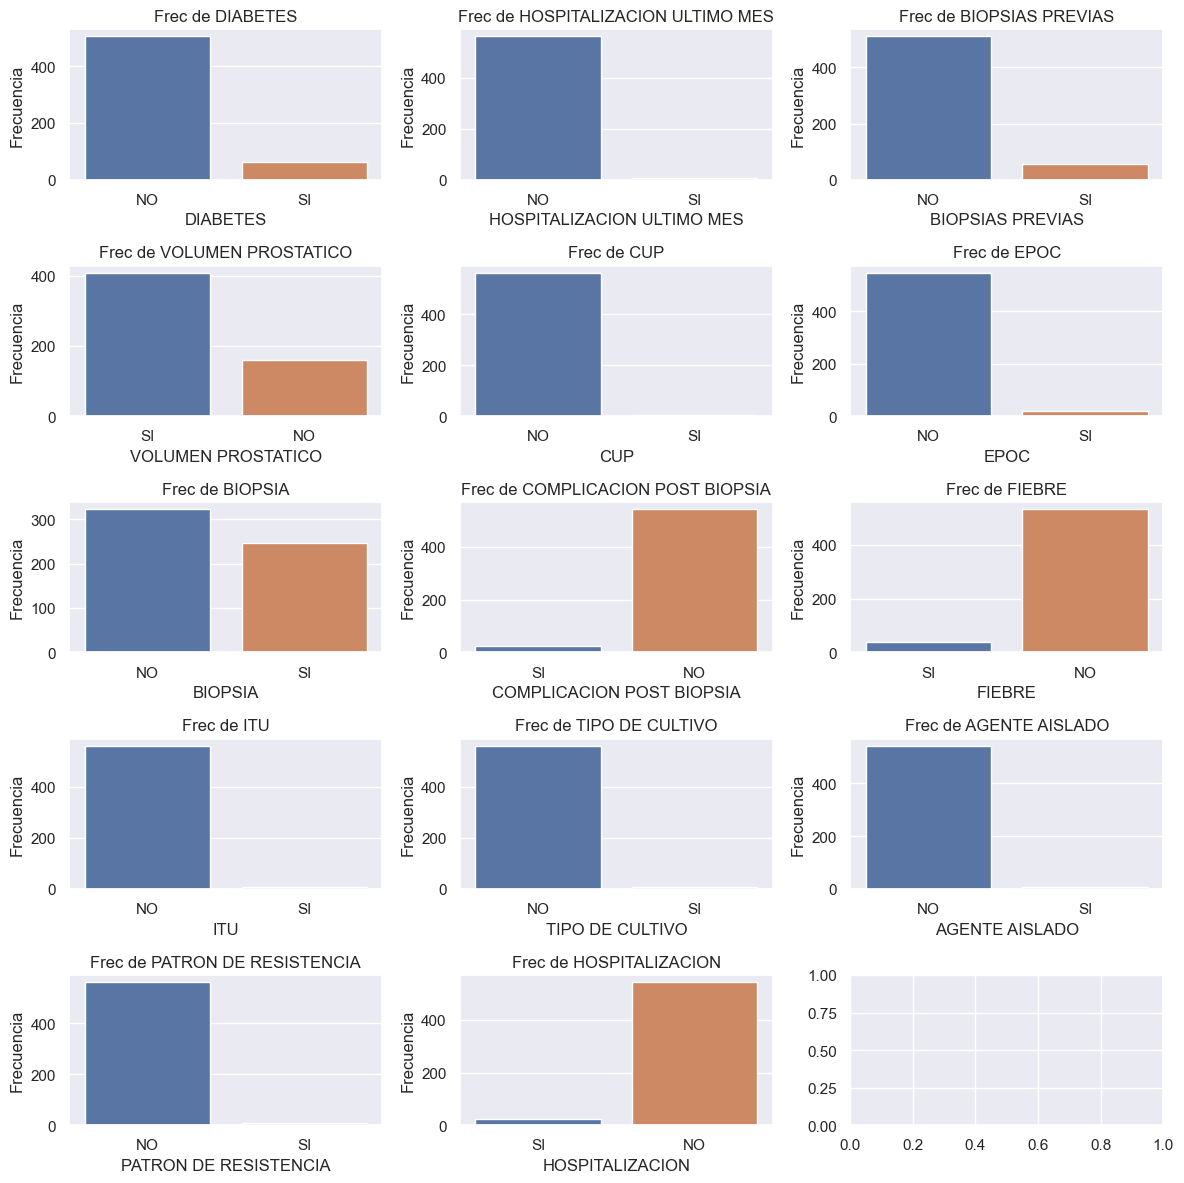

In [262]:
columnas_categoricas = [
'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
'EPOC', 'BIOPSIA', 'COMPLICACION POST BIOPSIA',
'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
'PATRON DE RESISTENCIA', 'HOSPITALIZACION',]

# subplots para cada variable categórica
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))  # número de filas y columnas, según variables categóricas

# Gráfico de barras para cada variable categórica
for i in range(len(columnas_categoricas)):
    sns.countplot(data=HospitalModelado, x=columnas_categoricas[i], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Frec de {columnas_categoricas[i]}')
    axes[i//3, i%3].set_ylabel('Frecuencia')

plt.tight_layout() # diseño de los subplots

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [263]:
# No se eliminarán columnas debido a los valores nulos, ya que es una proporción mínima y no afecta al modelado
# Los valores nulos se mantienen en todos los casos

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [264]:
#No

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Transformamos los valores de las columnas del DF HospitalOk.

En este DF decidimos dejar como dummies algunas categorías de múltiples valores 

In [265]:
columnas_a_transformarOk = ['DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
                          'EPOC', 'COMPLICACION POST BIOPSIA', 'FIEBRE', 'ITU', 'HOSPITALIZACION']

for columna in columnas_a_transformarOk:
    HospitalOk[columna].replace('SI', 1, inplace=True)
    HospitalOk[columna].replace('NO', 0, inplace=True)

In [266]:
# Creamos columnas binarias para cada categoría de múltiples valores
BIOPSIA_dummies = pd.get_dummies(HospitalOk['BIOPSIA'], prefix='BIOPSIA')
TIPO_DE_CULTIVO_dummies = pd.get_dummies(HospitalOk['TIPO DE CULTIVO'], prefix='TIPO_DE_CULTIVO')
ANTIBIOTICO_UTILIZADO_dummies = pd.get_dummies(HospitalOk['ANTIBIOTICO UTILIZADO'], prefix='ANTIBIOTICO_UTILIZADO')
AGENTE_AISLADO_dummies = pd.get_dummies(HospitalOk['AGENTE AISLADO'], prefix='AGENTE_AISLADO')
PATRON_DE_RESISTENCIA_dummies = pd.get_dummies(HospitalOk['PATRON DE RESISTENCIA'], prefix='PATRON_DE_RESISTENCIA')

# Concatenamos las columnas binarias al DataFrame original
HospitalOk = pd.concat([HospitalOk, BIOPSIA_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, TIPO_DE_CULTIVO_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, ANTIBIOTICO_UTILIZADO_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, AGENTE_AISLADO_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, PATRON_DE_RESISTENCIA_dummies], axis=1)

# Eliminamos las columnas originales
HospitalOk.drop(columns=['BIOPSIA'], inplace=True)
HospitalOk.drop(columns=['TIPO DE CULTIVO'], inplace=True)
HospitalOk.drop(columns=['ANTIBIOTICO UTILIZADO'], inplace=True)
HospitalOk.drop(columns=['AGENTE AISLADO'], inplace=True)
HospitalOk.drop(columns=['PATRON DE RESISTENCIA'], inplace=True)

Transformamos los valores de las columnas del DF HospitalModelado

En este DF transformamos a binarias todas las variables categóricas que lo permitan

In [267]:
columnas_a_transformarModelado =  [
'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
'EPOC', 'BIOPSIA', 'COMPLICACION POST BIOPSIA',
'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO','PATRON DE RESISTENCIA', 'HOSPITALIZACION',]

for columna in columnas_a_transformarModelado:
    HospitalModelado[columna].replace('SI', 1, inplace=True)
    HospitalModelado[columna].replace('NO', 0, inplace=True)

Eliminación de una columna considerada constante

In [268]:
# Eliminamos la columna original 'ANTIBIOTICO UTILIZADO', ya que todos los registros tienen un valor asignado,
# y no hay registros nulos o con valor 'NO', y bajo el enfoque binario trabajado, todos los valores serían 'SI',
# lo que resultaría redundante
HospitalModelado.drop(columns=['ANTIBIOTICO UTILIZADO'], inplace=True)

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [269]:
columnas_numericas = ['EDAD', 'PSA', 'MUESTRAS TOMADAS']
matriz_correlacion = HospitalModelado[columnas_numericas].corr()

Text(0.5, 1.0, 'Matriz de Correlación')

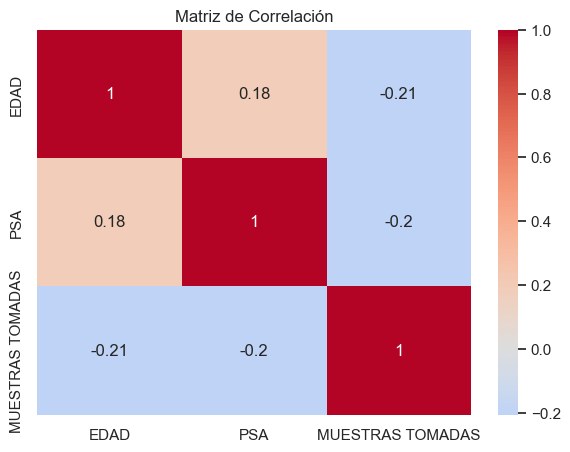

In [270]:
plt.figure(figsize=(7, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

Buscamos correlación entre columnas categóricas (pasadas a binario) y numéricas del DF HospitalModelado

In [271]:
columnas_Modelado =  [ 'EDAD', 'PSA', 'MUESTRAS TOMADAS',
'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
'EPOC', 'BIOPSIA', 'COMPLICACION POST BIOPSIA',
'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
]

In [272]:
matriz_correlacion1 = HospitalModelado[columnas_Modelado].corr()

Text(0.5, 1.0, 'Matriz de Correlación')

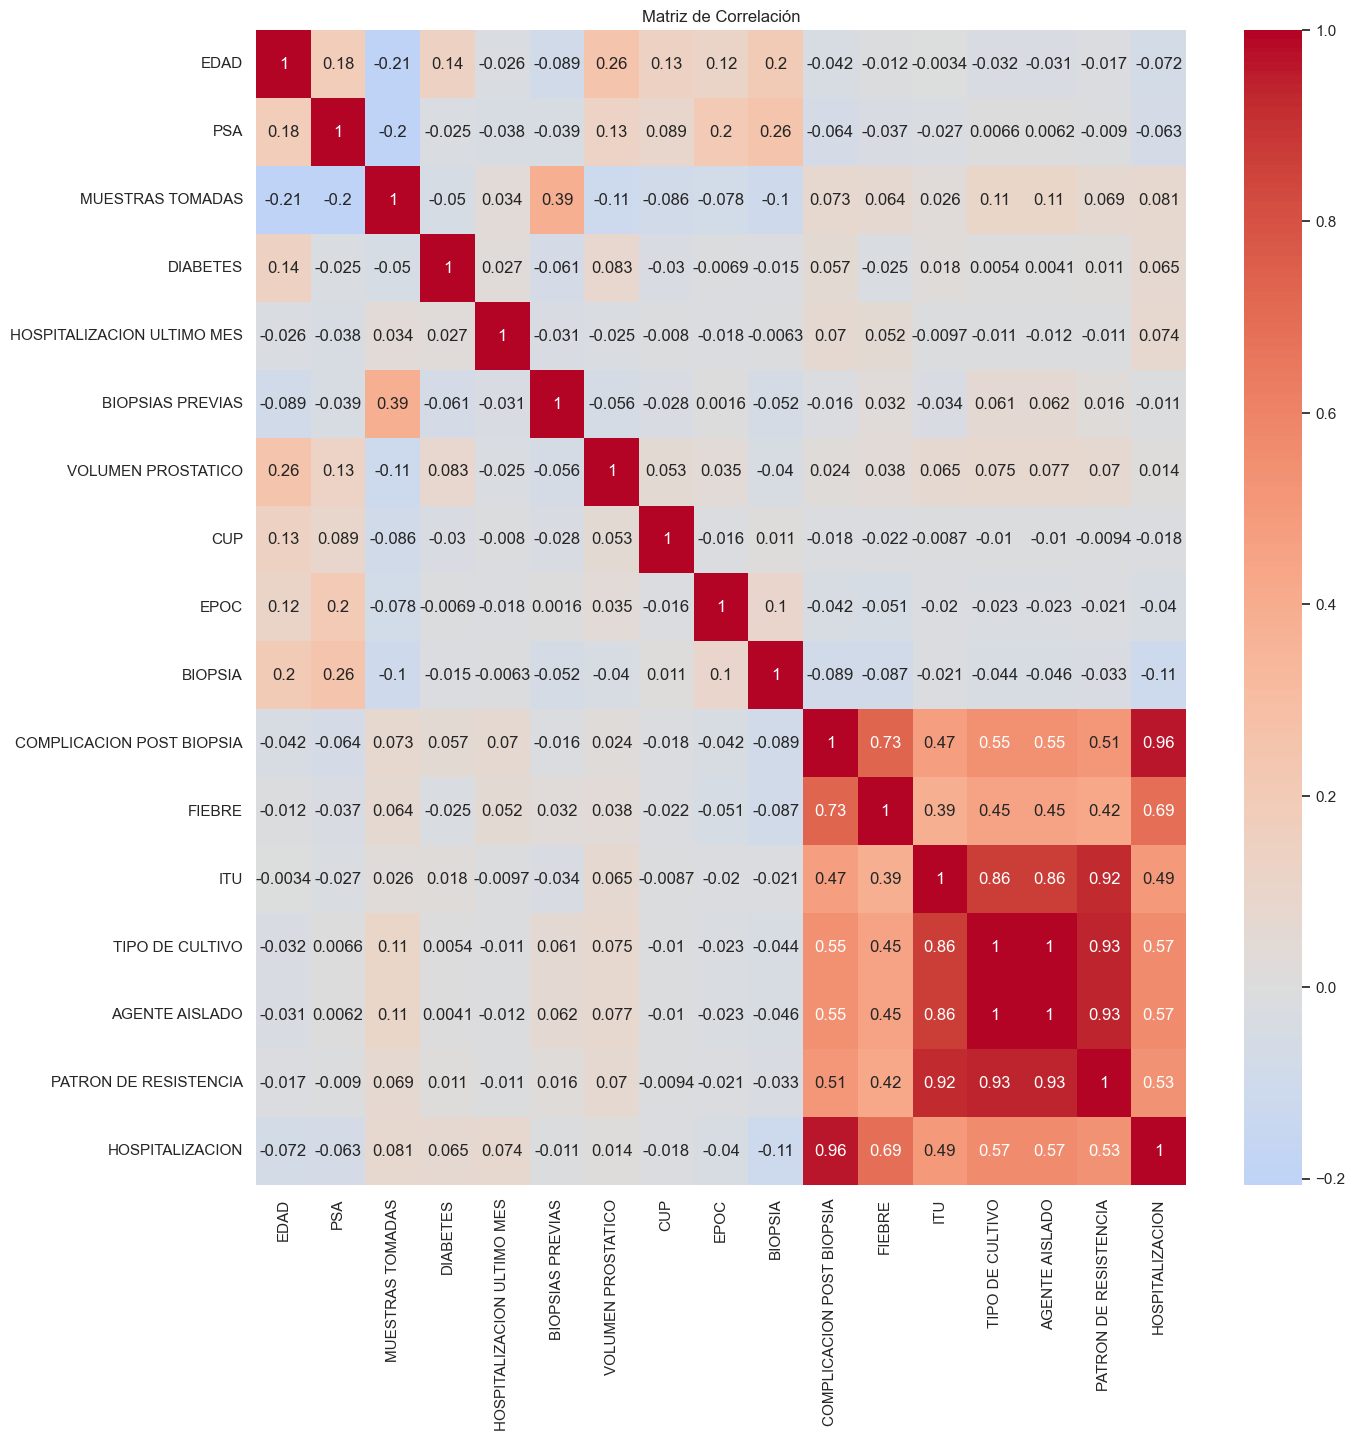

In [273]:
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacion1, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

Eliminación de una columna redundante

In [274]:
# Luego de verificar que AGENTE AISLADO y TIPO DE CULTIVO tienen 1.0 de correlación se elimina AGENTE AISLADO
HospitalModelado.drop(columns=['AGENTE AISLADO'], inplace=True)

Buscamos correlación entre las columnas categóricas (pasadas a binario) y numéricas del DF HospitalOk

In [275]:
columnas_binariasOk = [ 'EDAD', 'PSA', 'MUESTRAS TOMADAS', 'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS',
'VOLUMEN PROSTATICO', 'CUP', 'EPOC', 'COMPLICACION POST BIOPSIA', 'FIEBRE', 'ITU', 'HOSPITALIZACION']

In [276]:
matriz_correlacion2 = HospitalOk[columnas_binariasOk].corr()

Text(0.5, 1.0, 'Matriz de Correlación')

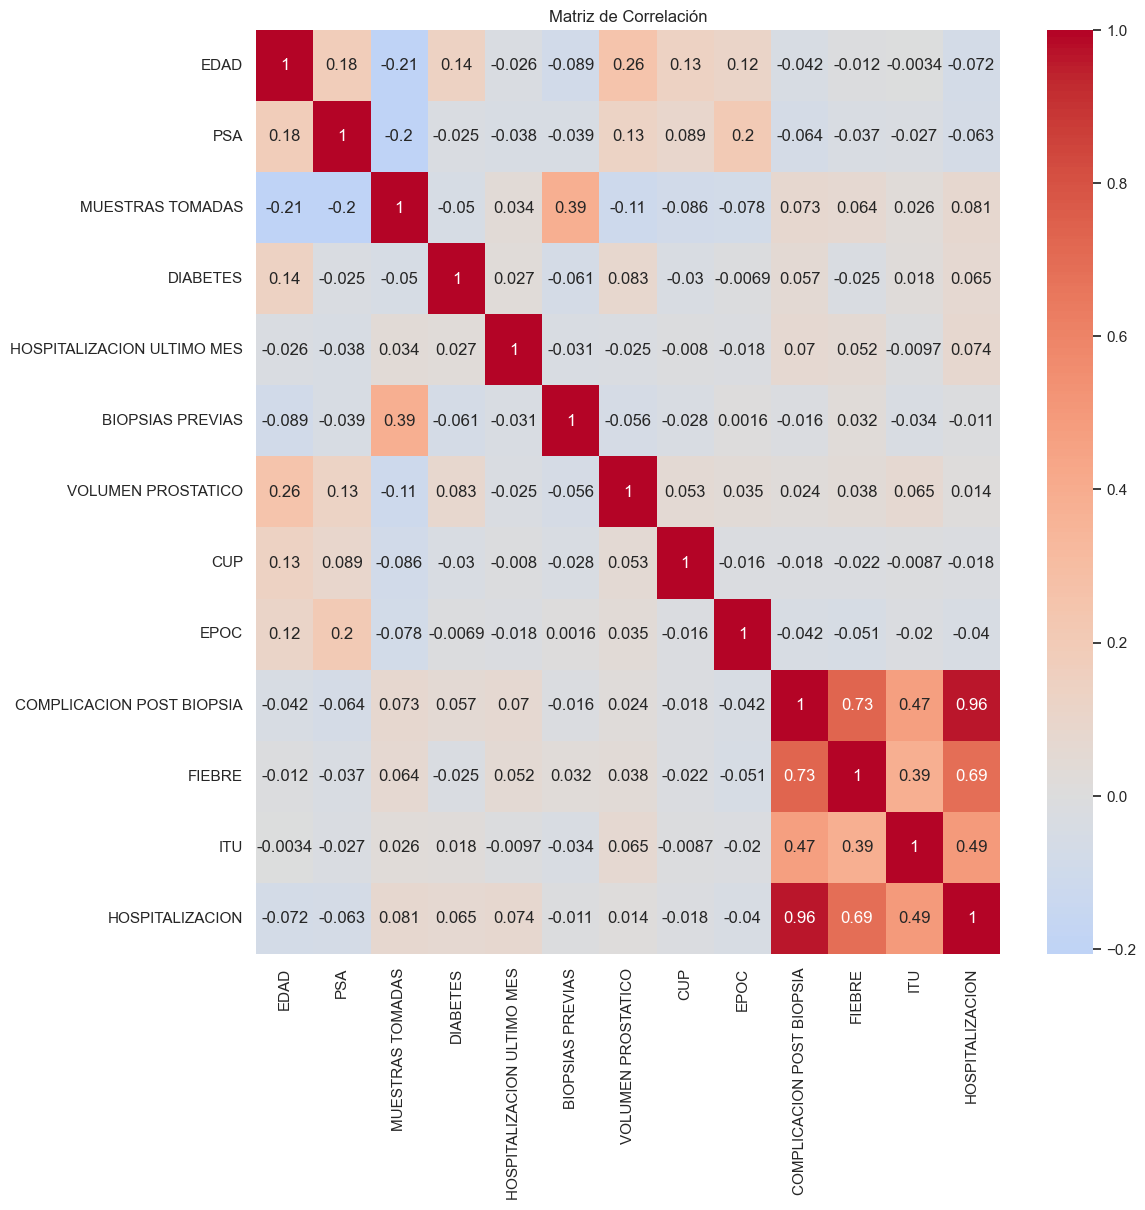

In [277]:
plt.figure(figsize=(12, 12))
sns.heatmap(matriz_correlacion2, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

EXTRA. Por curiosidad, observamos cómo se comportan todas las variables múltiples en matriz de correlación,
utilizando TODAS las columnas categóricas del DF HospitalOk

In [278]:
a = ['EDAD', 'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'PSA','BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
'MUESTRAS TOMADAS', 'CUP', 'EPOC','COMPLICACION POST BIOPSIA',
'FIEBRE', 'ITU', 'HOSPITALIZACION', 'BIOPSIA_ADENOCARCINOMA GLEASON 10', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
'BIOPSIA_ADENOCARCINOMA GLEASON 7', 'BIOPSIA_ADENOCARCINOMA GLEASON 8', 'BIOPSIA_ADENOCARCINOMA GLEASON 9',
'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS', 'BIOPSIA_HIPERPLASIA PROSTATICA', 'BIOPSIA_NEG',
'BIOPSIA_PROSTATITIS','TIPO_DE_CULTIVO_HEMOCULTIVO','TIPO_DE_CULTIVO_HEMOCULTIVO Y UROCULTIVO', 'TIPO_DE_CULTIVO_NO',
'TIPO_DE_CULTIVO_UROCULTIVO', 'ANTIBIOTICO_UTILIZADO_CEFALOSPORINA_AMINOGLUCOCIDO',
'ANTIBIOTICO_UTILIZADO_FLUOROQUINOLONA_AMINOGLUCOSIDO', 'ANTIBIOTICO_UTILIZADO_OROQUINOLONAS',
'ANTIBIOTICO_UTILIZADO_OTROS', 'AGENTE_AISLADO_E.COLI', 'AGENTE_AISLADO_NO', 'AGENTE_AISLADO_PSEUDOMONAS AERUGINOSA',
'PATRON_DE_RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R',
'PATRON_DE_RESISTENCIA_MULTI SENSIBLE', 'PATRON_DE_RESISTENCIA_NO',
'PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA',
'PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA']

In [279]:
matriz_correlacion3 = HospitalOk[a].corr()

Text(0.5, 1.0, 'Matriz de Correlación')

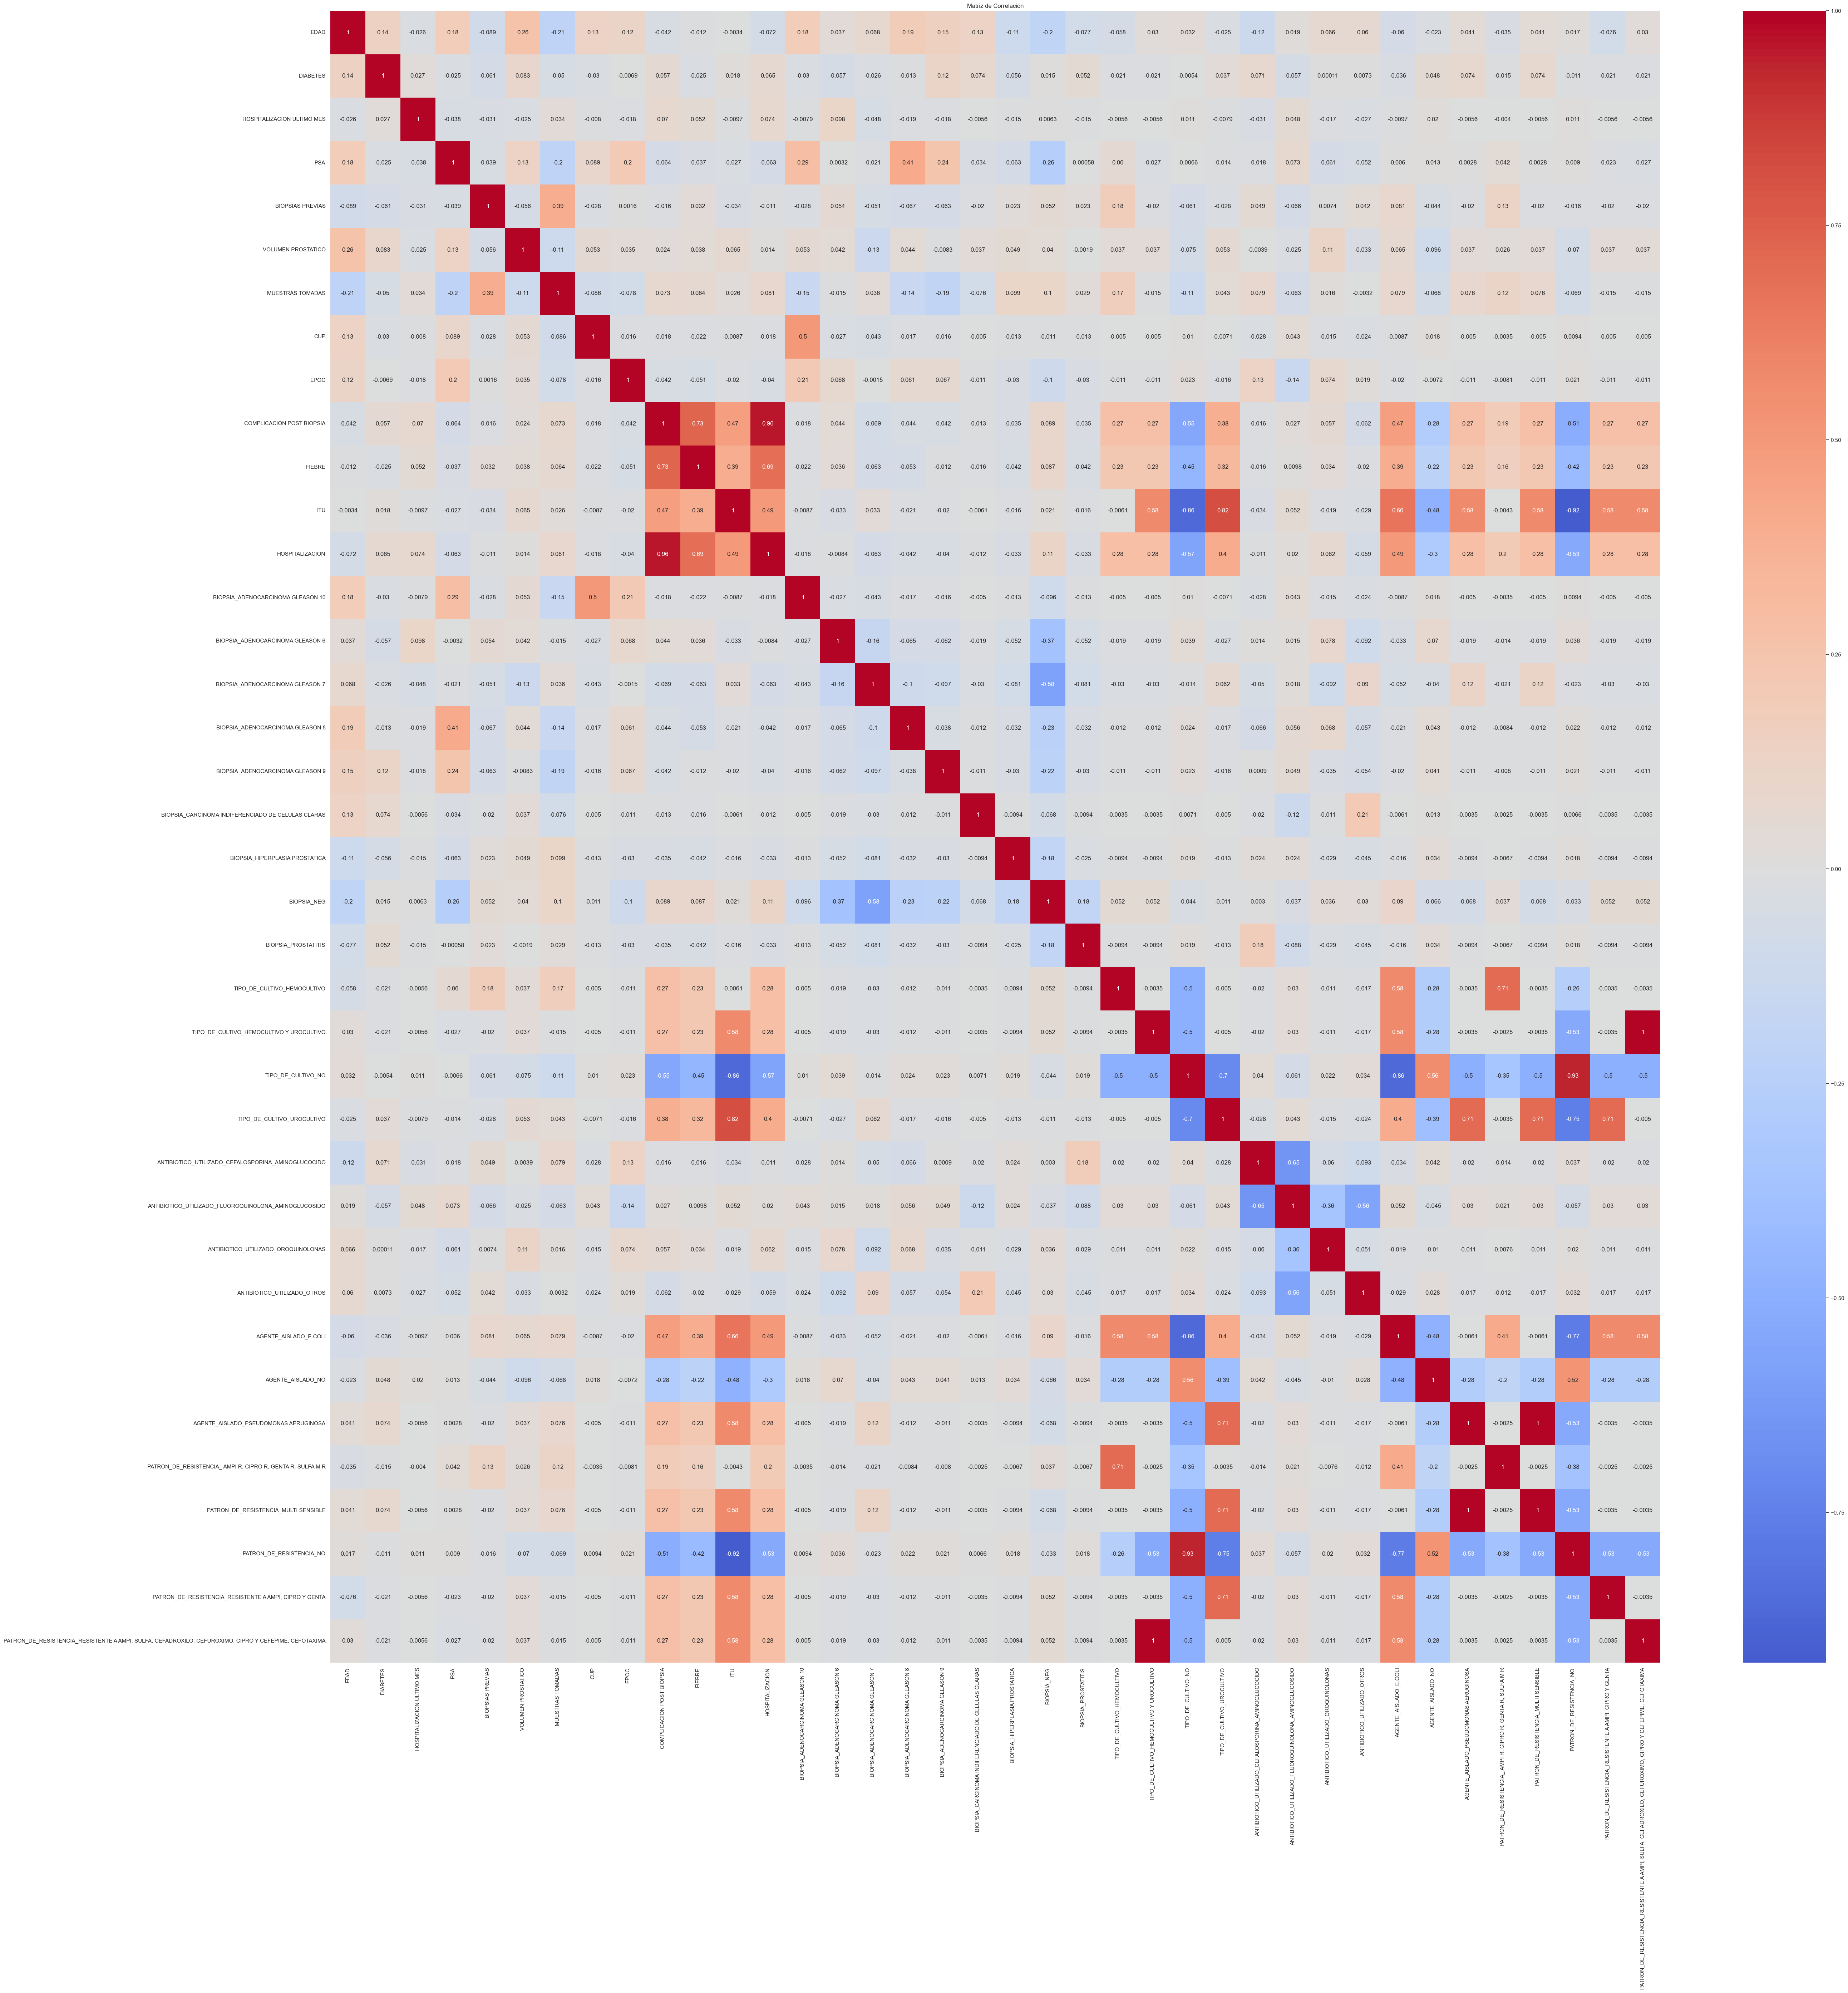

In [280]:
plt.figure(figsize=(60, 60))
sns.heatmap(matriz_correlacion3, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

Recordatorio:

* Encontramos plena correlación (1.00) entre las variables AGENTE AISLADO y TIPO DE CULTIVO. Se eliminó la columna AGENTE AISLADO, ya que de ambas era la que poseía más nulos. Vale aclarar que los NaN no son tenidos en cuenta en la correlación, por esa razón el resultado fue 1.00. Se sabe que los nulos se podrían completar con la información de la columna TIPO DE CULTIVO pero se descarta la opción ya que se opta por desetimar la columna AGENTE AISLADO.

* Observamos que no había variación por tipo de antibiótico utilizado, y todos los registros tenían un anitibiótico utilizado, por lo que la columna pasada a SI/NO se volvía una constante. Se eliminó la columna.



Nota:

* Encontramos alta correlación (0.96) entre las variables COMPLICACION INFECCIOSA POST BIOPSIA y HOSPITALIZACION.

Podemos decir:

* De 568 pacientes, 26 tuvieron complicación post biopsia. De esos 26, 24 la tuvieron durante la primera semana, y esos 24 son los pacientes que fueron hospitalizados.

* Si se requiere una predicción sobre los pacientes que requerirán hospitalización, no podemos tener en cuenta esta variable, ya que la hospitalización se da estrictamente cuando un paciente presenta complicación post biopsia durante la primera semana.

* La virtud de una buena predicción consta de no tener que esperar a que se presente la complicación infecciosa para indicar que el paciente necesitará hospitalización, sino indicarlo antes del síntoma. Si aceptamos este enfoque, entonces en la predicción no deberíamos aceptar tener en cuenta FIEBRE, ITU, TIPO DE CULTIVO, AGENTE AISLADO ni PATRON DE RESISTENCIA, ya que todas obedecen a datos referidos a complicaciones infecciosas post biopsia.

* Los modelos predictivos deberemos entrenarlos entonces en base a datos de :
- Antecedentes del paciente (EDAD)
- Morbilidad asociada al paciente (DIABETES, HOSP.ULTIMO MES, CUP, EPOC, VOLUMEN PROSTATICO)
- Antecedentes relacionados con la toma de la biopsia (PSA, BIOPSIAS PREVIAS, MUESTRAS TOMADAS, BIOPSIA)

# Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

Exportamos HospitalOk como HospitalOk_multi. Este DF guarda varias columnas de múltiple valor

In [281]:
# Exportamos el DataFrame a un archivo Excel
HospitalOk.to_csv(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\Hospitales-ML\HospitalOk_multi.csv', index=False)

Exportamos HospitalModelado como HospitalModelado. Este DF registra en formato binario todas las categorías posibles

In [282]:
# Exportamos el DataFrame a un archivo Excel
HospitalModelado.to_csv(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\Hospitales-ML\HospitalModelado.csv', index=False)